# Introduction to Monte Carlo Simulation in Finance

## Simulating Some Trajectories

The following function simulates a trajectory of Brownian motion at time instants *tt*. The function **rnorm** generates random numbers from normal distribution, the syntax is the following: **rnorm(n, mean, sd)**. For example the command **rnorm(1000, 3, .25)** generates 1000 numbers from a normal with mean 3 and sd=.25. 

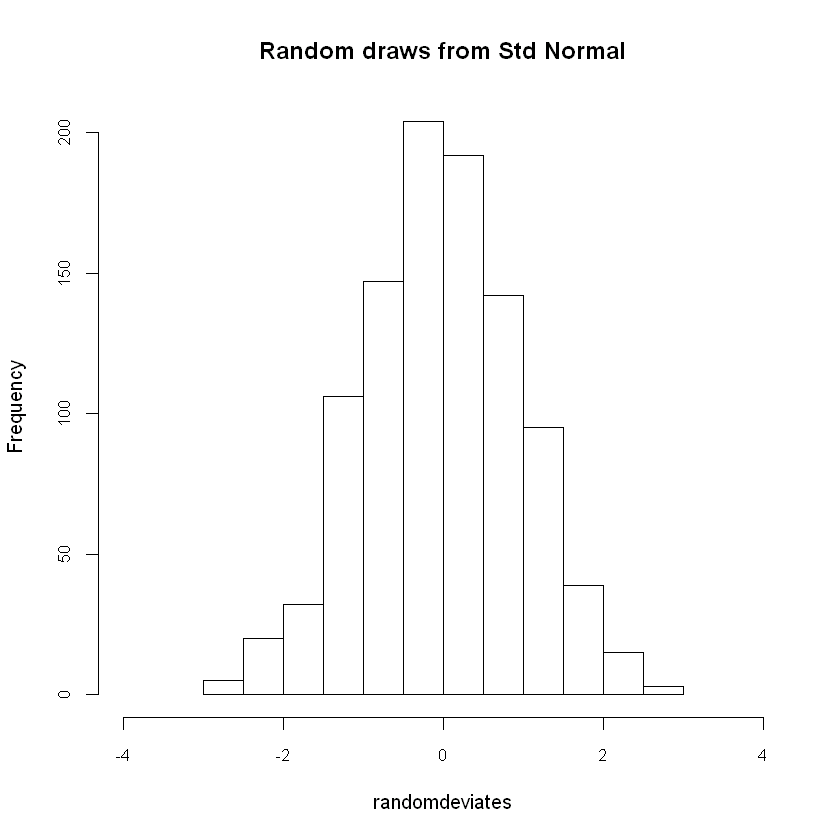

In [21]:
randomdeviates<-rnorm(1000,0,1)
hist(randomdeviates, main="Random draws from Std Normal", cex.axis=.8, xlim=c(-4,4))

The function cumsum returns a vector whose elements are the cumulative sums, products, minima or maxima of the elements of the argument. For example:

In [22]:
cumsum(1:100)

[1]    1    3    6   10   15   21   28   36   45   55   66   78   91  105  120
 [16]  136  153  171  190  210  231  253  276  300  325  351  378  406  435  465
 [31]  496  528  561  595  630  666  703  741  780  820  861  903  946  990 1035
 [46] 1081 1128 1176 1225 1275 1326 1378 1431 1485 1540 1596 1653 1711 1770 1830
 [61] 1891 1953 2016 2080 2145 2211 2278 2346 2415 2485 2556 2628 2701 2775 2850
 [76] 2926 3003 3081 3160 3240 3321 3403 3486 3570 3655 3741 3828 3916 4005 4095
 [91] 4186 4278 4371 4465 4560 4656 4753 4851 4950 5050

https://me.ucsb.edu/~moehlis/APC591/tutorials/tutorial7/node2.html

In [23]:
wiener = function( n ) {
  e = rnorm( n, 0, 1 )
  x = c(0,cumsum( e )) / sqrt(n)
  return(x)
}

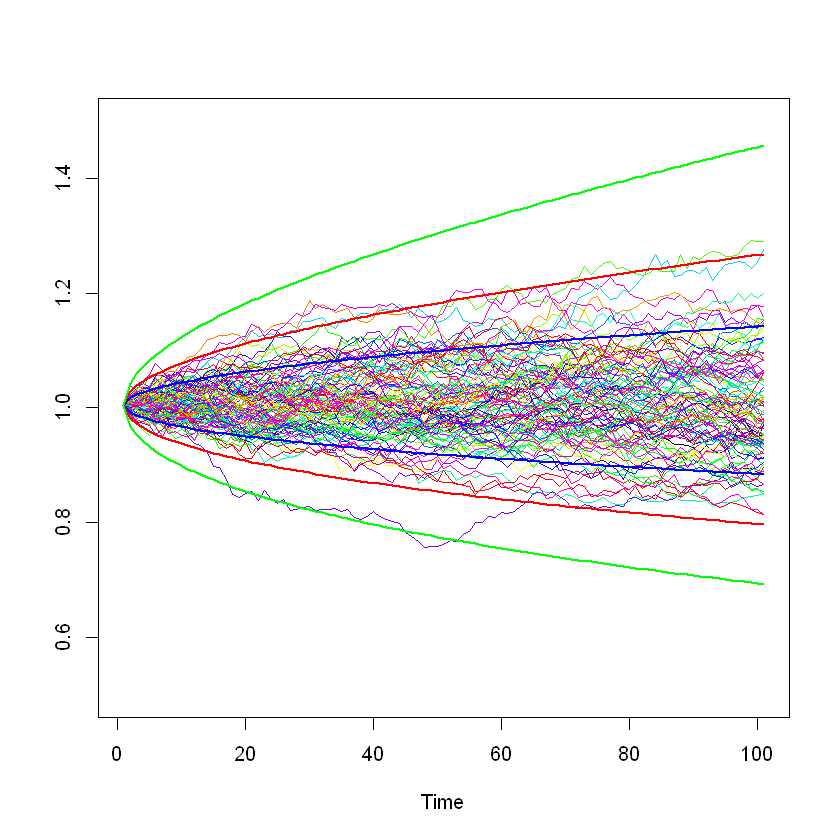

In [24]:
time_step  <- 100
nsim       <- 100
t          <- seq(0,1,1/time_step)
delta_t    <- t[2]-t[1]

m          <- 0.5 
s          <- 1 

# volatility
sigma   <- s * sqrt(delta_t)
# drift 
drift   <- (m + .5*sigma*sigma)*delta_t

paths   <- wiener(time_step)  
S0      <- 1 
S1      <- S0*exp(drift + sigma * paths)

lower = 0.5 #0.99*min(S1)
upper = 1.5 #1.01*max(S1)

plot( S1, type="l",ylim = c(lower,upper), xlab = "Time", ylab="" )
for(i in 1:nsim){
    paths <- wiener(time_step)  
    S     <- S0*exp(drift + sigma * paths)
    lines( S , col=sample(rainbow(100)))
}

# Adding confidence level curve

# 90-th percentile
p <- qnorm(0.9)
y1=S0*exp(drift+p*sigma*sqrt(t))
y2=S0*exp(drift-p*sigma*sqrt(t))
lines(y1, lwd=2,col='blue')
lines(y2, lwd=2,col='blue')

# 99-th percentile
p <- qnorm(0.99)
y1=S0*exp(drift+p*sigma*sqrt(t))
y2=S0*exp(drift-p*sigma*sqrt(t))
lines(y1, lwd=2,col='red')
lines(y2, lwd=2,col='red')

# 99.99-th percentile
p <- qnorm(0.9999)
y1=S0*exp(drift+p*sigma*sqrt(t))
y2=S0*exp(drift-p*sigma*sqrt(t))
lines(y1, lwd=2,col='green')
lines(y2, lwd=2,col='green')
